# Studdent Performance Analysis and Prediction #

### Thanking to SIT ICOE Hackathon 2024 for give us this opportunity ##

## Objectives ##
In this notebook, we will  :

- *Predict a student Grade will in final exam based on certain information given*
- *Compare the two learning algorithms*
- *Find the best algorithm with high accuracy*

We will be using three learning algorithms:

- *Lasso Regrassion*
- *Linear Regrassion*

### import libraries ###

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read dataset ###

In [3]:
# Read CSV file into a DataFrame
df = pd.read_csv('Student.csv')


### About Dataset ###

*Before process the dataset let's describe it briefly:*

- For the sake of applying our skills in machine learning, we will choose an appropriate dataset for our problematic :<br><br>

    - This dataset approach students achievement in secondary education.

    - The shape of our data set is *(399 rows × 15 columns)*.

    - *No missing* values in the data, so we do not have to process lines with missing values.

    - The data attributes *include demographic*, social and school related features and it was collected by using school reports and questionnaires.

    - *The last column tells us about the Students Grade A, B and C.*

    - The dataset is taken from *Kaggle.com*

*Now let's explain every column in the dataframe*
- Student_Age : student's Age [numeric: 20 18 25 19 21 26]
- Sex : student's sex [binary: "F" - female or "M" - male]
- High_School_Type : student's High School type [binary: 'State' or 'Private']
- Additional_Work : student's Additional Worke [binary: 'Yes' or 'No']
- Sports_activity : students's Sports_activity [binary: 'No' or 'Yes']
- Transportation : student's Transportation [binary: 'Bus' or 'Private']
- Weekly_Study_Hours : student's Weekly_Study_Hours [numeric: 12, 8, 4, 0, 2]
- Attendance : student's Attendance [nominal: 'Always' 'Never' 'Sometimes']
- Reading : student's Reading duratino  [numeric: from 0 to 12 ]
- Notes : student's have Notes [binary: 'Yes' or 'No']
- Listening_in_Class : student's Listening in Class [binary: 'No' or 'Yes']
- Project_work : student's work in Project [binary: 'yes' or 'No']

*The last column:*
- Grade : student grade in the final exam ['A', 'B', 'C']

In [4]:
df.head()

,Student_ID,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,STUDENT1,19-22,Male,State,50%,Yes,No,Private,12,Always,Yes,Yes,No,No,A
1,STUDENT2,19-22,Male,State,50%,Yes,No,Private,12,Always,Yes,No,Yes,Yes,A
2,STUDENT3,19-22,Male,State,50%,No,No,Private,12,Never,No,No,No,Yes,A
3,STUDENT4,18,Female,Private,50%,Yes,No,Bus,12,Always,No,Yes,No,No,A
4,STUDENT5,19-22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,A


### Drop unuseable Columns ###

In [5]:
df.drop('Student_ID',axis=1,inplace=True)
df.drop('Scholarship',axis=1,inplace=True)
df.head()

,Student_Age,Sex,High_School_Type,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,19-22,Male,State,Yes,No,Private,12,Always,Yes,Yes,No,No,A
1,19-22,Male,State,Yes,No,Private,12,Always,Yes,No,Yes,Yes,A
2,19-22,Male,State,No,No,Private,12,Never,No,No,No,Yes,A
3,18,Female,Private,Yes,No,Bus,12,Always,No,Yes,No,No,A
4,19-22,Male,Private,No,No,Bus,12,Always,Yes,No,Yes,Yes,A


### Data Inspection ###

In [6]:
# check for missing values

df.isnull().sum()

Student_Age           0
Sex                   0
High_School_Type      0
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

In [7]:
# check for duplicates
df.duplicated().sum()

96

In [8]:
df.describe()

,Weekly_Study_Hours
count,399.000000
mean,4.952381
std,4.630599
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,12.000000


## Convert Student_age range values to single value 

In [9]:
# Function to convert age ranges to mean values
def age_range_to_mean(age_range):
    if isinstance(age_range, str) and '-' in age_range:
        start, end = map(int, age_range.split('-'))
        return (start + end) / 2
    elif isinstance(age_range, str):
        return int(age_range)
    else:
        return int(age_range)

# Apply the function to the 'Student_Age' column
df['Student_Age'] = df['Student_Age'].apply(age_range_to_mean)
# Assuming df is your DataFrame

# Convert 'Student_Age' column to integers
df['Student_Age'] = df['Student_Age'].astype(int)

df


,Student_Age,Sex,High_School_Type,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,20,Male,State,Yes,No,Private,12,Always,Yes,Yes,No,No,A
1,20,Male,State,Yes,No,Private,12,Always,Yes,No,Yes,Yes,A
2,20,Male,State,No,No,Private,12,Never,No,No,No,Yes,A
3,18,Female,Private,Yes,No,Bus,12,Always,No,Yes,No,No,A
4,20,Male,Private,No,No,Bus,12,Always,Yes,No,Yes,Yes,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,18,Female,State,No,No,Private,0,Sometimes,No,Yes,No,Yes,B
395,18,Male,State,Yes,Yes,Private,0,Always,Yes,No,No,No,C
396,18,Male,State,No,Yes,Private,0,Always,No,No,No,Yes,C
397,18,Female,State,Yes,Yes,Private,0,Always,No,Yes,Yes,No,C


In [10]:
combined_values = pd.concat([df['Weekly_Study_Hours'], df['Grade']])

# Extract unique values
unique_values = combined_values.unique()

print(unique_values)

[12 8 4 0 2 'A' 'B' 'C']


### a) Generate Hitmap ###

In [11]:
# corr = df.corr()
# plt.figure(figsize=(30,30))
# sns.heatmap(corr, annot=True, cmap="Reds")
# plt.title('Correlation Heatmap', fontsize=20)

### b) Distribution plot ###

In this step let's look deeper into each features and make a final summary for best social,demographic and school conditions.

## b.1) Students status by Gender

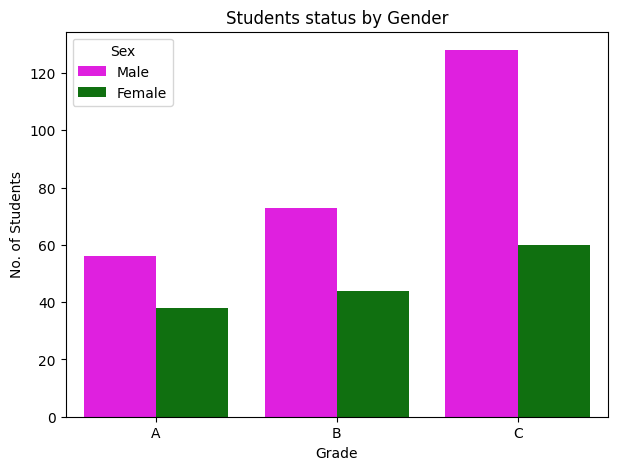

In [11]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(data=df, x='Grade', hue='Sex', palette=['magenta', 'green'], ax=ax)
ax.set_title('Students status by Gender')
ax.set_xlabel('Grade')
ax.set_ylabel('No. of Students')
plt.show()

### b.2) Students status by Age ###

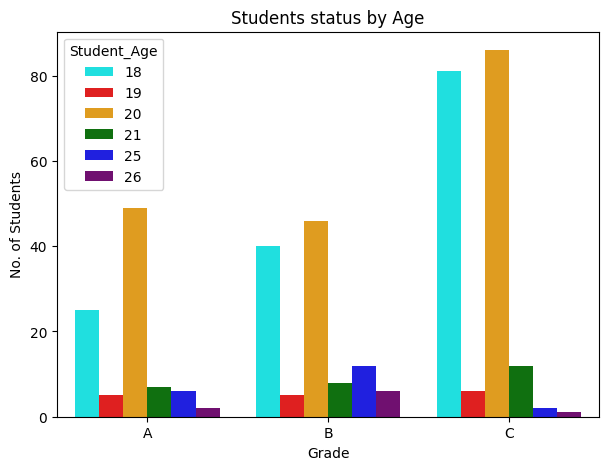

In [12]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(data=df, x='Grade', hue='Student_Age', palette=['cyan','red','orange','green','blue','purple'], ax=ax)
ax.set_title('Students status by Age')
ax.set_xlabel('Grade')
ax.set_ylabel('No. of Students')
plt.show()

### b.3) Students status by High School Type ###

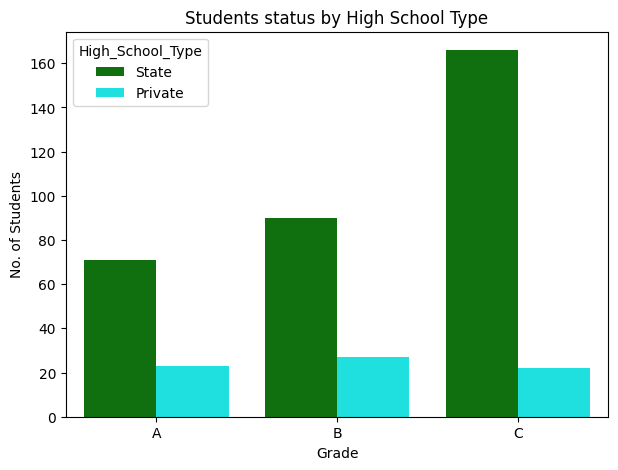

In [13]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(data=df, x='Grade', hue='High_School_Type', palette=['green', 'cyan'], ax=ax)
ax.set_title('Students status by High School Type')
ax.set_xlabel('Grade')
ax.set_ylabel('No. of Students')
plt.show()

### b.4) Students status by Sports Activity

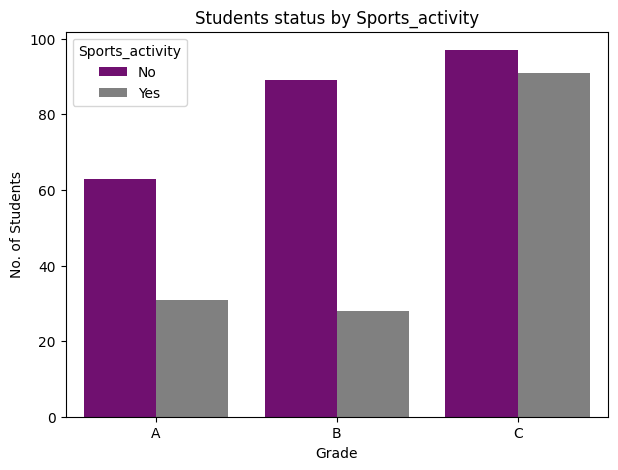

In [14]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(data=df, x='Grade', hue='Sports_activity', palette=['purple','gray'], ax=ax)
ax.set_title('Students status by Sports_activity')
ax.set_xlabel('Grade')
ax.set_ylabel('No. of Students')
plt.show()

### b.5) Students Attendance by Transportation

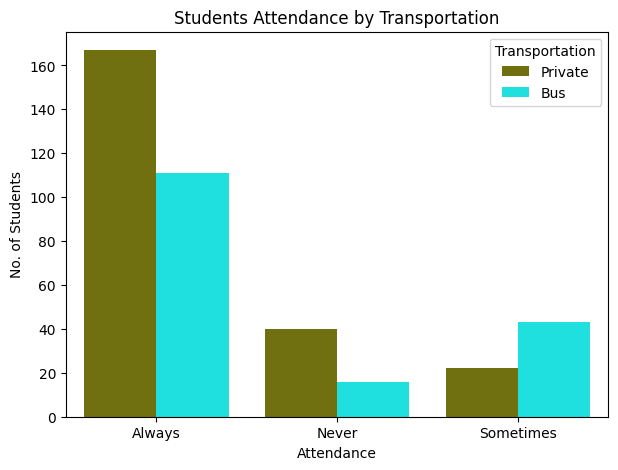

In [15]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(data=df, x='Attendance', hue='Transportation', palette=['olive','cyan'], ax=ax)
ax.set_title('Students Attendance by Transportation')
ax.set_xlabel('Attendance')
ax.set_ylabel('No. of Students')
plt.show()

### b.6) Students status by Listening in Class

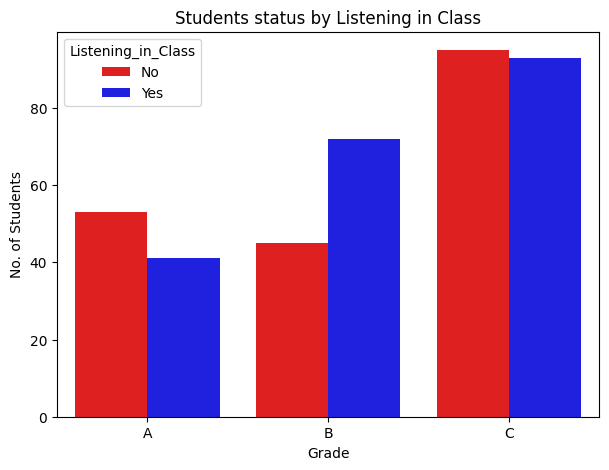

In [16]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(data=df, x='Grade', hue='Listening_in_Class', palette=['red','blue'], ax=ax)
ax.set_title('Students status by Listening in Class')
ax.set_xlabel('Grade')
ax.set_ylabel('No. of Students')
plt.show()

### b.7) Students status by Weekly Study Hours

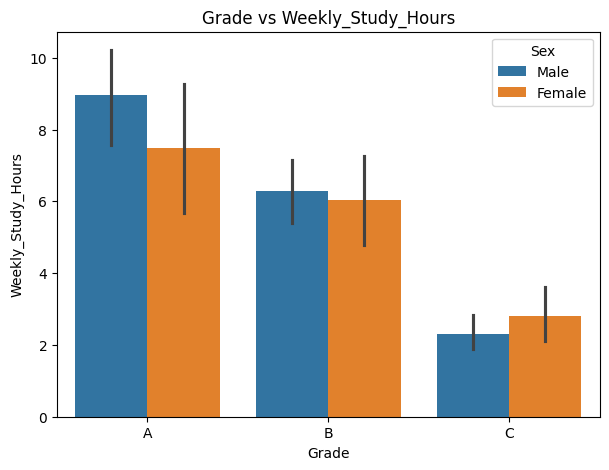

In [17]:
plt.figure(figsize=(7,5))
plt.title('Grade vs Weekly_Study_Hours')
sns.barplot(hue="Sex", y="Weekly_Study_Hours", x="Grade", data=df)
plt.show()

### b.8) Students status by Reading

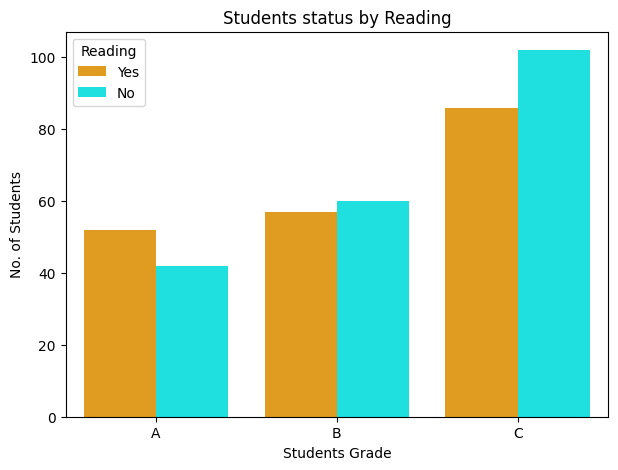

In [18]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(data=df, x='Grade', hue='Reading', palette=['orange','cyan'], ax=ax)
ax.set_title('Students status by Reading')
ax.set_xlabel('Students Grade')
ax.set_ylabel('No. of Students')
plt.show()

### b.9) Students status by Project Work

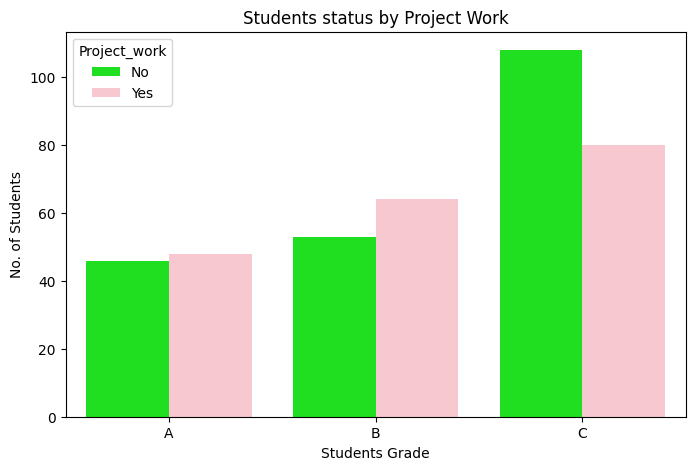

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data=df, x='Grade', hue='Project_work', palette=['lime','pink'], ax=ax)
ax.set_title('Students status by Project Work')
ax.set_xlabel('Students Grade')
ax.set_ylabel('No. of Students')
plt.show()

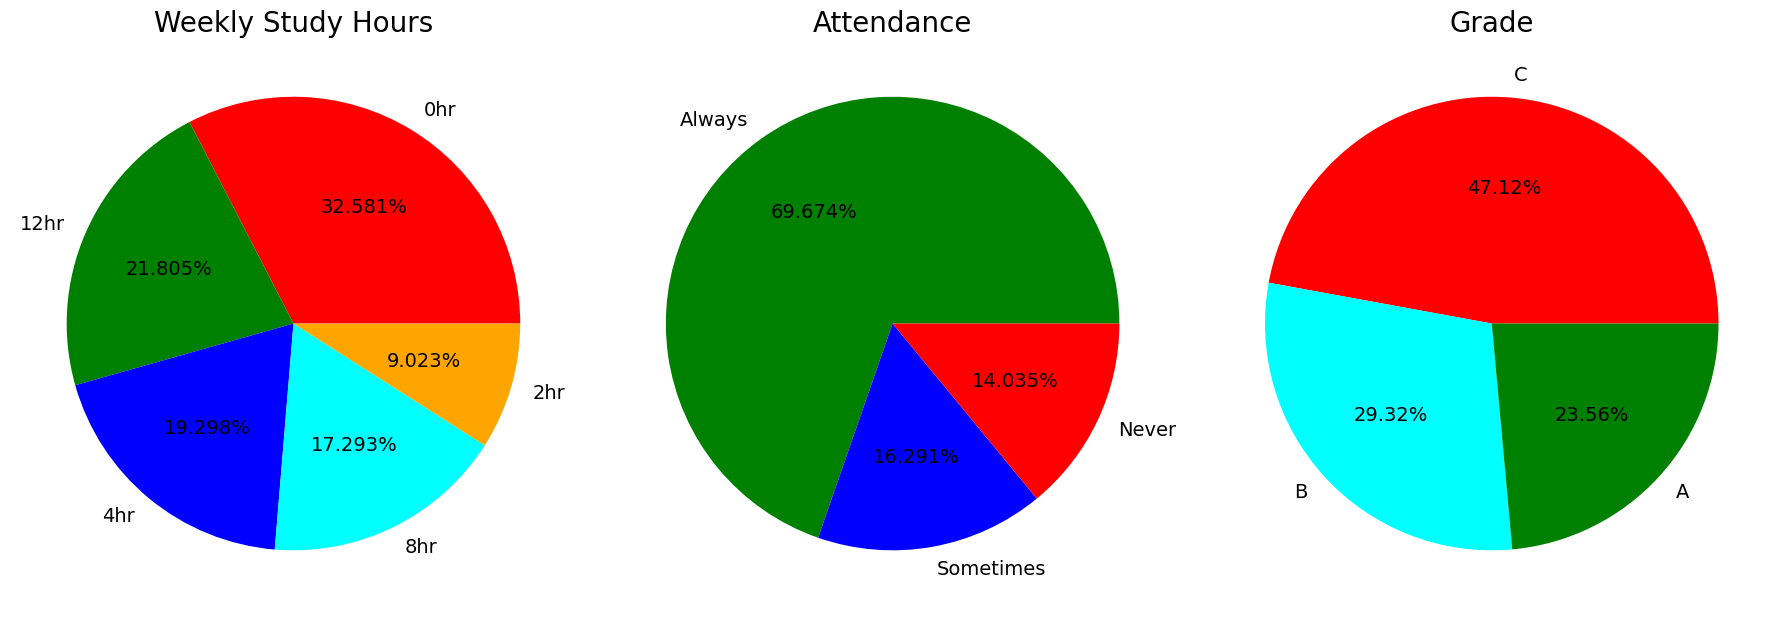

In [20]:
plt.rcParams['figure.figsize'] = (30, 12)


plt.subplot(1, 5, 1)
size = df['Weekly_Study_Hours'].value_counts()
labels = '0hr', '12hr','4hr','8hr','2hr'
color = ['red', 'green','blue','cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%1.3f%%',textprops={'fontsize':14})
plt.title('Weekly Study Hours', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['Attendance'].value_counts()
labels = 'Always','Sometimes', 'Never'
color = ['green', 'blue', 'red']

plt.pie(size, colors = color,labels = labels,autopct = '%1.3f%%',textprops={'fontsize':14})
plt.title('Attendance', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['Grade'].value_counts()
labels = 'C', 'B','A'
color = ['red','cyan','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%',textprops={'fontsize':14})
plt.title('Grade', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### General Conclusion

### Summary:
  After dealing with the most relevent features ,the valedictorian of an exellents conditions for heigh academic  potentials is likely to have this profile:

1. Study more than 10 hours a week

2. No absences to classes

3. Readig continuously

4. Try to use comfortable Transportation

5. Students have to work on project

6. Listening in class continuously 

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Student_Age         399 non-null    int32 
 1   Sex                 399 non-null    object
 2   High_School_Type    399 non-null    object
 3   Additional_Work     399 non-null    object
 4   Sports_activity     399 non-null    object
 5   Transportation      399 non-null    object
 6   Weekly_Study_Hours  399 non-null    int64 
 7   Attendance          399 non-null    object
 8   Reading             399 non-null    object
 9   Notes               399 non-null    object
 10  Listening_in_Class  399 non-null    object
 11  Project_work        399 non-null    object
 12  Grade               399 non-null    object
dtypes: int32(1), int64(1), object(11)
memory usage: 39.1+ KB


In [22]:
df.columns

Index(['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work',
       'Sports_activity', 'Transportation', 'Weekly_Study_Hours', 'Attendance',
       'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade'],
      dtype='object')

## Check columns unique values

In [23]:
# Assuming df is your DataFrame

# List of columns for which you want to find unique values
columns = ['Student_Age', 'Sex', 'High_School_Type',
           'Additional_Work', 'Sports_activity', 'Transportation',
           'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes',
           'Listening_in_Class', 'Project_work', 'Grade']

# Iterate through each column and print unique values
for column in columns:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")


Unique values for 'Student_Age': [20 18 25 19 21 26]
Unique values for 'Sex': ['Male' 'Female']
Unique values for 'High_School_Type': ['State' 'Private']
Unique values for 'Additional_Work': ['Yes' 'No']
Unique values for 'Sports_activity': ['No' 'Yes']
Unique values for 'Transportation': ['Private' 'Bus']
Unique values for 'Weekly_Study_Hours': [12  8  4  0  2]
Unique values for 'Attendance': ['Always' 'Never' 'Sometimes']
Unique values for 'Reading': ['Yes' 'No']
Unique values for 'Notes': ['Yes' 'No']
Unique values for 'Listening_in_Class': ['No' 'Yes']
Unique values for 'Project_work': ['No' 'Yes']
Unique values for 'Grade': ['A' 'B' 'C']


In [24]:
# Assuming df is your DataFrame

# List of columns for which you want to find unique values
columns = ['Student_Age', 'Sex', 'High_School_Type',
           'Additional_Work', 'Sports_activity', 'Transportation',
           'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes',
           'Listening_in_Class', 'Project_work', 'Grade']

# Iterate through each column and print unique values
for column in columns:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")

Unique values for 'Student_Age': [20 18 25 19 21 26]
Unique values for 'Sex': ['Male' 'Female']
Unique values for 'High_School_Type': ['State' 'Private']
Unique values for 'Additional_Work': ['Yes' 'No']
Unique values for 'Sports_activity': ['No' 'Yes']
Unique values for 'Transportation': ['Private' 'Bus']
Unique values for 'Weekly_Study_Hours': [12  8  4  0  2]
Unique values for 'Attendance': ['Always' 'Never' 'Sometimes']
Unique values for 'Reading': ['Yes' 'No']
Unique values for 'Notes': ['Yes' 'No']
Unique values for 'Listening_in_Class': ['No' 'Yes']
Unique values for 'Project_work': ['No' 'Yes']
Unique values for 'Grade': ['A' 'B' 'C']


## Now we convert string values to numberical

In [25]:
def numerical_data():
    df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})
    df['High_School_Type'] = df['High_School_Type'].map({'Private': 0, 'State': 1})
    df['Additional_Work'] = df['Additional_Work'].map({'No': 0, 'Yes': 1})
    df['Sports_activity'] = df['Sports_activity'].map({'No': 0, 'Yes': 1})
    df['Transportation'] = df['Transportation'].map({'Private': 0, 'Bus': 1, 'State': 2})
    df['Attendance'] = df['Attendance'].map({'Always': 1, 'Never': 0, 'Sometimes': 2})
    df['Reading'] = df['Reading'].map({'No': 0, 'Yes': 1})
    df['Notes'] = df['Notes'].map({'No': 0, 'Yes': 1})
    df['Listening_in_Class'] = df['Listening_in_Class'].map({'No': 0, 'Yes': 1})
    df['Project_work'] = df['Project_work'].map({'No': 0, 'Yes': 1})
    df['Grade'] = df['Grade'].map({'A': 0, 'B': 1, 'C': 2})
numerical_data()


Text(0.5, 1.0, 'Correlation Heatmap')

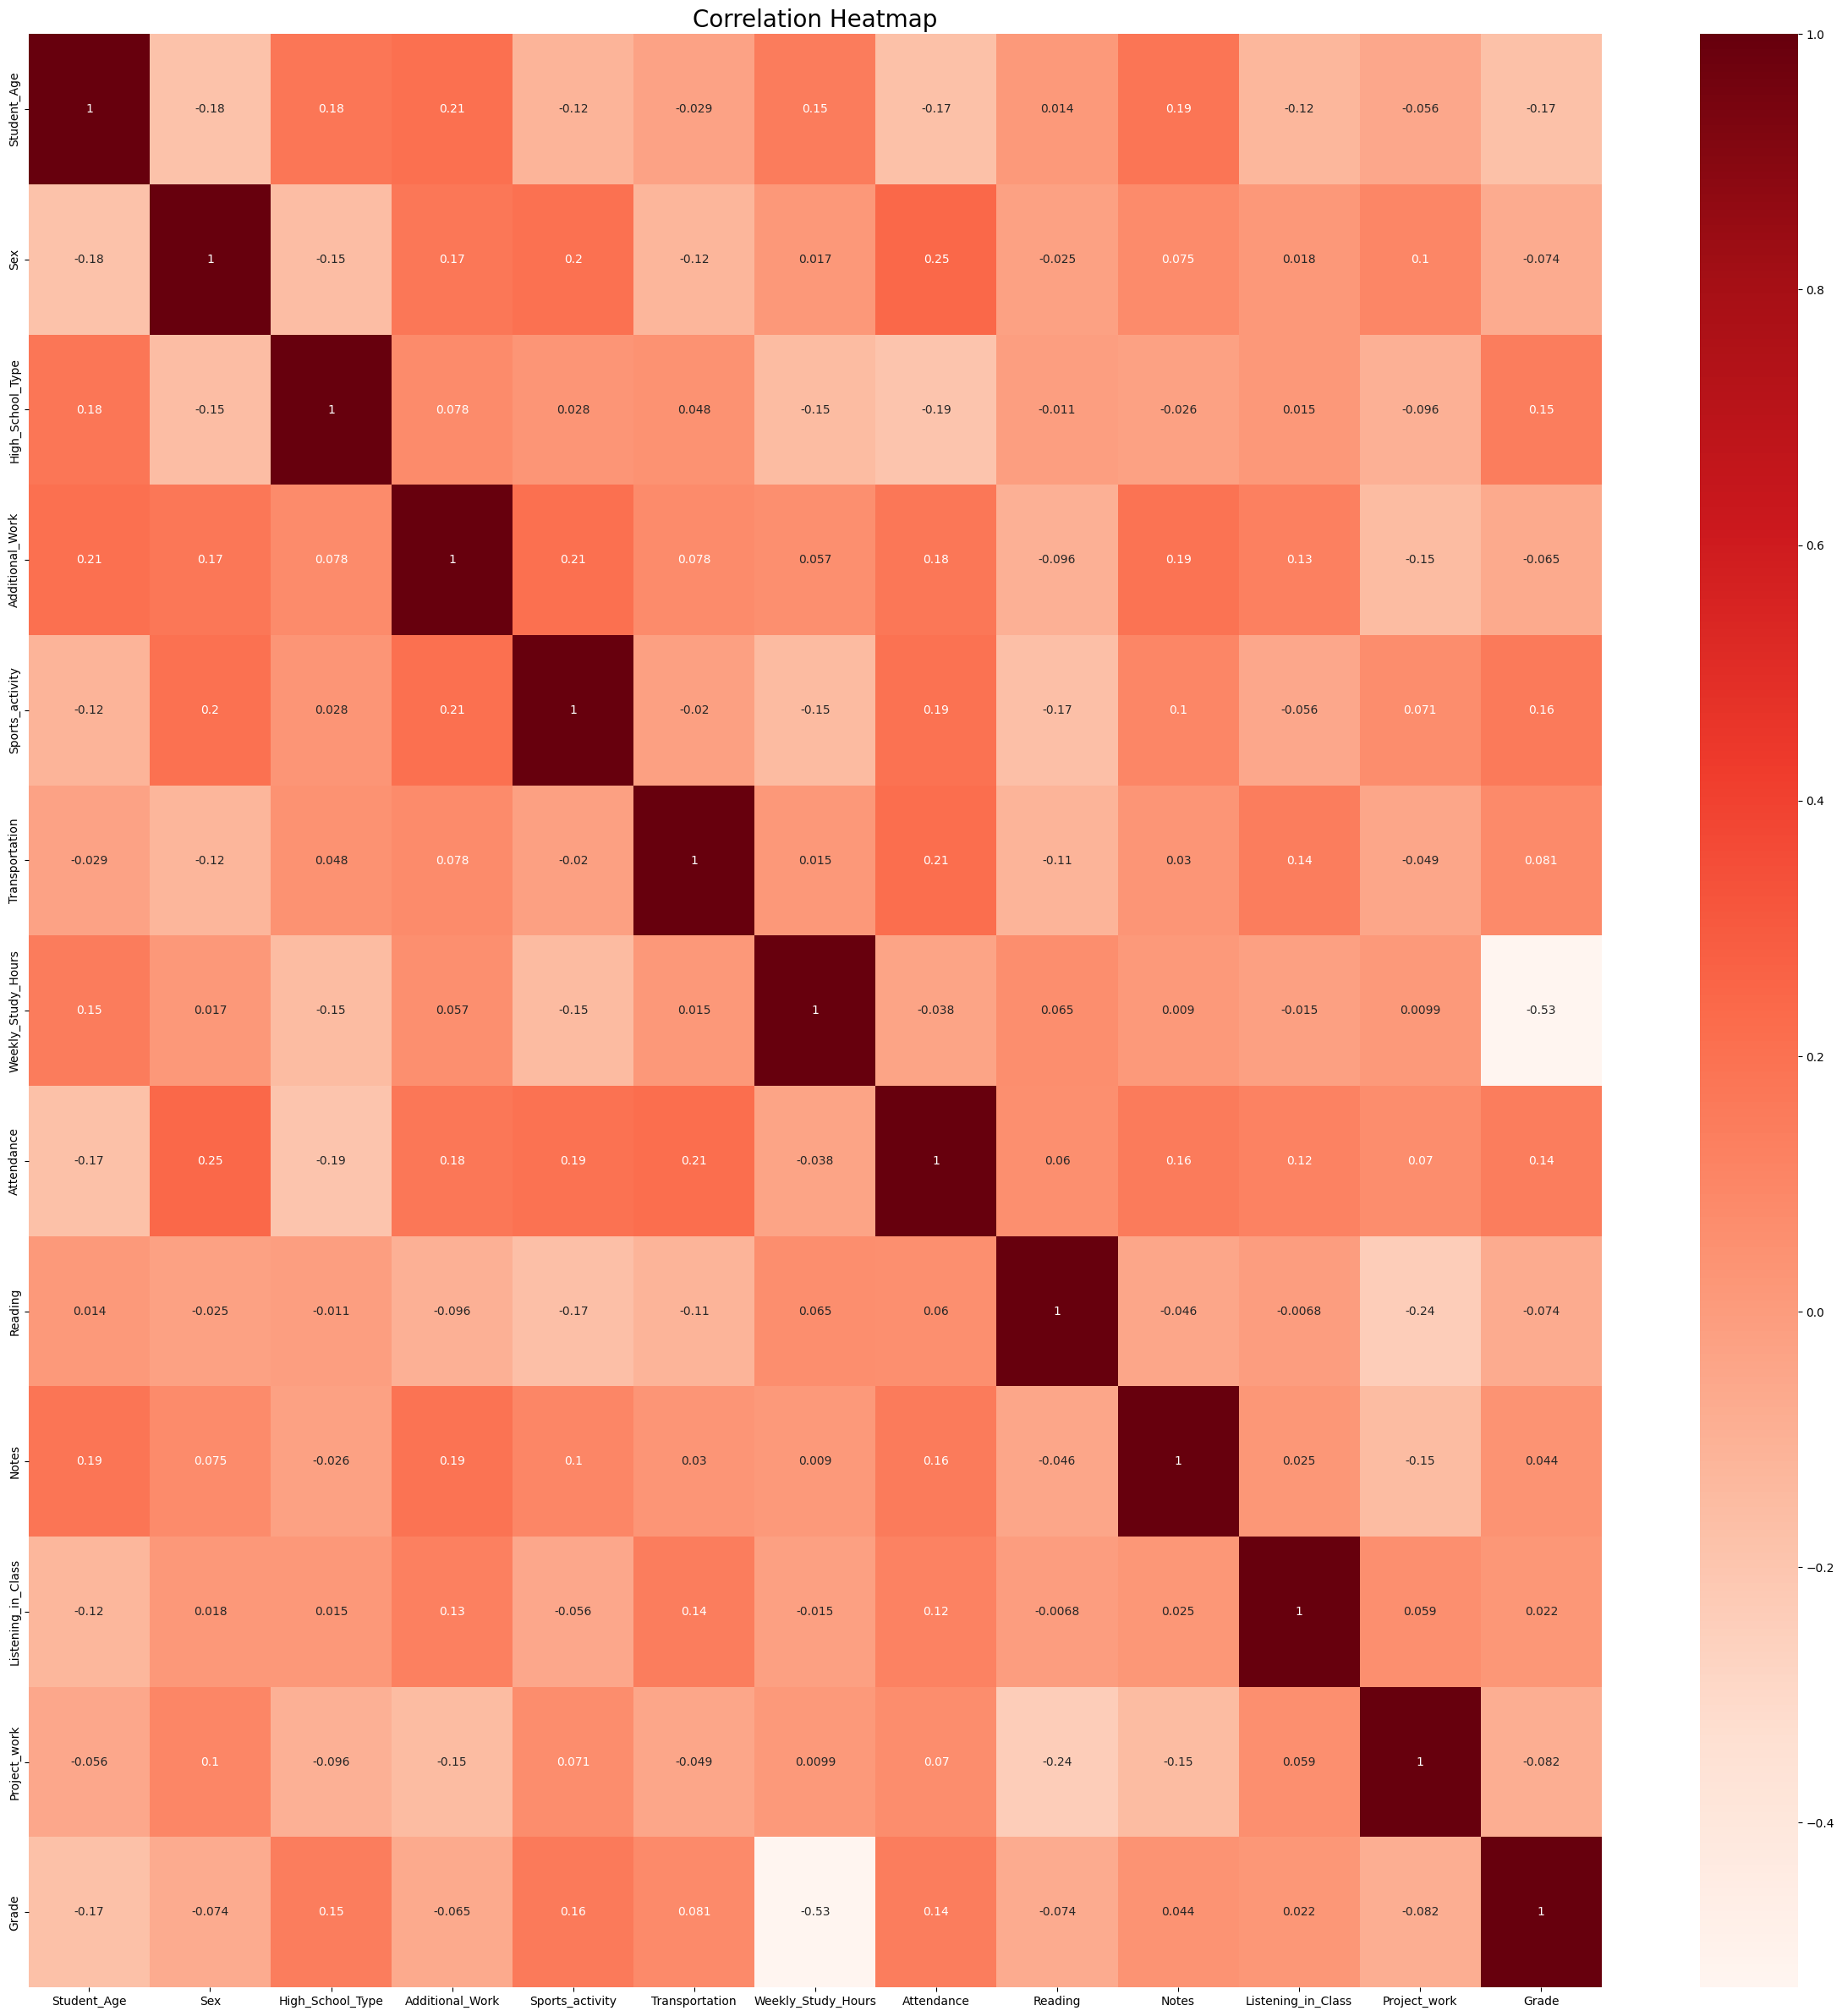

In [26]:
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [27]:
columns = ['Student_Age', 'Sex', 'High_School_Type',
           'Additional_Work', 'Sports_activity', 'Transportation',
           'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes',
           'Listening_in_Class', 'Project_work', 'Grade']

# Iterate through each column and print unique values
for column in columns:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")

Unique values for 'Student_Age': [20 18 25 19 21 26]
Unique values for 'Sex': [0 1]
Unique values for 'High_School_Type': [1 0]
Unique values for 'Additional_Work': [1 0]
Unique values for 'Sports_activity': [0 1]
Unique values for 'Transportation': [0 1]
Unique values for 'Weekly_Study_Hours': [12  8  4  0  2]
Unique values for 'Attendance': [1 0 2]
Unique values for 'Reading': [1 0]
Unique values for 'Notes': [1 0]
Unique values for 'Listening_in_Class': [0 1]
Unique values for 'Project_work': [0 1]
Unique values for 'Grade': [0 1 2]


In [28]:
df.head()

,Student_Age,Sex,High_School_Type,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,20,0,1,1,0,0,12,1,1,1,0,0,0
1,20,0,1,1,0,0,12,1,1,0,1,1,0
2,20,0,1,0,0,0,12,0,0,0,0,1,0
3,18,1,0,1,0,1,12,1,0,1,0,0,0
4,20,0,0,0,0,1,12,1,1,0,1,1,0


In [29]:
# Assuming df is your DataFrame

# Drop specified columns and assign the result to a new DataFrame df1
df1 = df.drop(columns=['Student_Age','Additional_Work', 'Transportation','Notes'])

# Print DataFrame to verify changes
df1


,Sex,High_School_Type,Sports_activity,Weekly_Study_Hours,Attendance,Reading,Listening_in_Class,Project_work,Grade
0,0,1,0,12,1,1,0,0,0
1,0,1,0,12,1,1,1,1,0
2,0,1,0,12,0,0,0,1,0
3,1,0,0,12,1,0,0,0,0
4,0,0,0,12,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...
394,1,1,0,0,2,0,0,1,1
395,0,1,1,0,1,1,0,0,2
396,0,1,1,0,1,0,0,1,2
397,1,1,1,0,1,0,1,0,2


## Model Accuracy check

## 1) Using SVM(Support Vector Machine)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target variable (y)
X = df1.drop('Grade', axis=1)  # Features
y = df1['Grade']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Support Vector Machine model
svm_model = SVR(kernel='linear')  # You can adjust the kernel parameter
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) Value:", r2)

# Calculate accuracy metrics
accuracy_rmse = 1 / rmse
accuracy_r2 = r2

# Weighted average of both accuracy measures (adjust weights as needed)
accuracy_svm = (accuracy_rmse + accuracy_r2) / 2
print("Accuracy:", accuracy_svm)


Mean Squared Error: 0.4972257395580332
Root Mean Squared Error (RMSE): 0.7051423541087524
R-squared (R^2) Value: 0.1912973994481798
Accuracy: 0.8047253806050205


Mean Squared Error: 0.4972257395580332
Root Mean Squared Error (RMSE): 0.7051423541087524
R-squared (R^2) Value: 0.1912973994481798
Accuracy: 0.8047253806050205


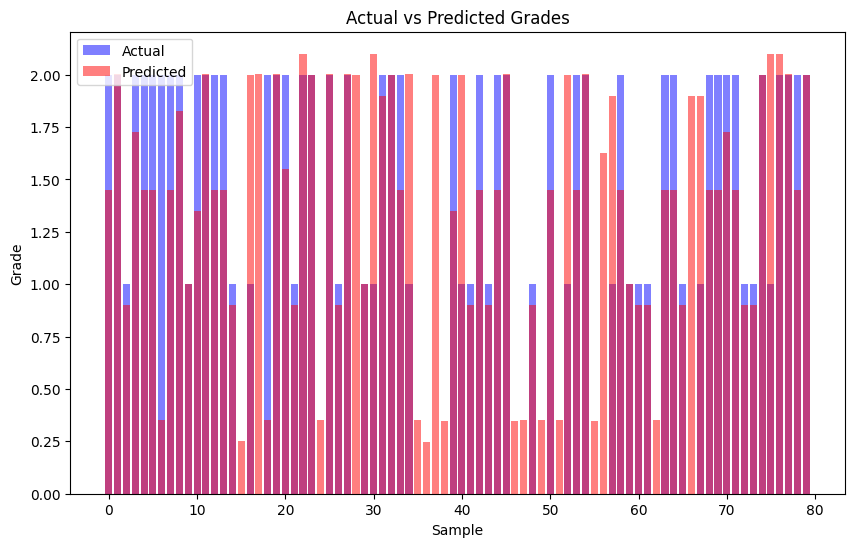

Training Time: 0.057259559631347656 seconds
Testing Time: 0.005788326263427734 seconds


In [31]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Measure training time
start_time = time.time()
svm_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure testing time
start_time = time.time()
y_pred = svm_model.predict(X_test)
testing_time = time.time() - start_time

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) Value:", r2)

# Calculate accuracy metrics
accuracy_rmse = 1 / rmse
accuracy_r2 = r2

# Weighted average of both accuracy measures (adjust weights as needed)
accuracy = (accuracy_rmse + accuracy_r2) / 2
print("Accuracy:", accuracy)

# Plotting accuracy graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test)), y_test, color='blue', alpha=0.5, label='Actual')
plt.bar(range(len(y_pred)), y_pred, color='red', alpha=0.5, label='Predicted')
plt.title('Actual vs Predicted Grades')
plt.xlabel('Sample')
plt.ylabel('Grade')
plt.legend()
plt.show()

# Print training and testing time
print("Training Time:", training_time, "seconds")
print("Testing Time:", testing_time, "seconds")


## 2) Using Lasso Regrassion

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score

# Assuming df is your DataFrame with features and target variable

# Split the data into features (X) and target variable (y)
X = df1.drop('Grade', axis=1)  # Features
y = df1['Grade']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) Value:", r2)


accuracy_rmse = 1 / rmse
accuracy_r2 = r2
    
    # Weighted average of both accuracy measures (adjust weights as needed)
accuracy_lasso = (accuracy_rmse + accuracy_r2) / 2
print("Accuracy:", accuracy_lasso)

Mean Squared Error: 0.46550423782684114
Root Mean Squared Error (RMSE): 0.6822787097857013
R-squared (R^2) Value: 0.2428901849830284
Accuracy: 0.8542834367468206


Mean Squared Error: 0.46550423782684114
Root Mean Squared Error (RMSE): 0.6822787097857013
R-squared (R^2) Value: 0.2428901849830284
Accuracy: 0.8542834367468206


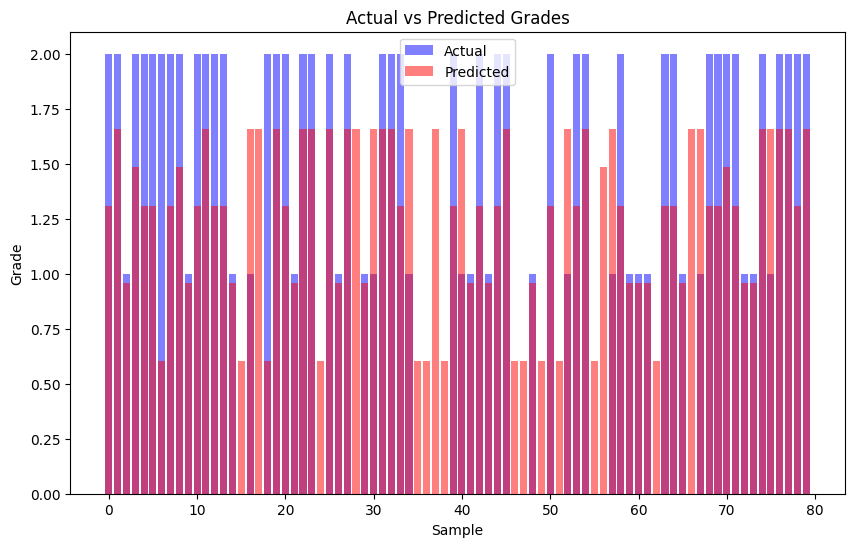

Training Time: 0.007997751235961914 seconds
Testing Time: 0.007016658782958984 seconds


In [33]:
import time
import matplotlib.pyplot as plt

# Measure training time
start_time = time.time()
lasso_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure testing time
start_time = time.time()
y_pred = lasso_model.predict(X_test)
testing_time = time.time() - start_time

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) Value:", r2)

# Calculate accuracy metrics
accuracy_rmse = 1 / rmse
accuracy_r2 = r2

# Weighted average of both accuracy measures (adjust weights as needed)
accuracy = (accuracy_rmse + accuracy_r2) / 2
print("Accuracy:", accuracy)

# Plotting accuracy graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test)), y_test, color='blue', alpha=0.5, label='Actual')
plt.bar(range(len(y_pred)), y_pred, color='red', alpha=0.5, label='Predicted')
plt.title('Actual vs Predicted Grades')
plt.xlabel('Sample')
plt.ylabel('Grade')
plt.legend()
plt.show()

# Print training and testing time
print("Training Time:", training_time, "seconds")
print("Testing Time:", testing_time, "seconds")

## 3) Using Linear Regrassion

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
# Assuming df is your DataFrame

# Prepare the data
X = df1.drop('Grade', axis=1)  # Features (independent variables)
y = df1['Grade']                # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) Value:", r2)


accuracy_rmse = 1 / rmse
accuracy_r2 = r2
    
    # Weighted average of both accuracy measures (adjust weights as needed)
accuracy_lr = (accuracy_rmse + accuracy_r2) / 2
print("Accuracy:", accuracy_lr)

Mean Squared Error: 0.40752679742028947
Root Mean Squared Error (RMSE): 0.6383782557546032
R-squared (R^2) Value: 0.3371864031791989
Accuracy: 0.9518278990323696


Mean Squared Error: 0.40752679742028947
Root Mean Squared Error (RMSE): 0.6383782557546032
R-squared (R^2) Value: 0.3371864031791989
Accuracy: 0.9518278990323696


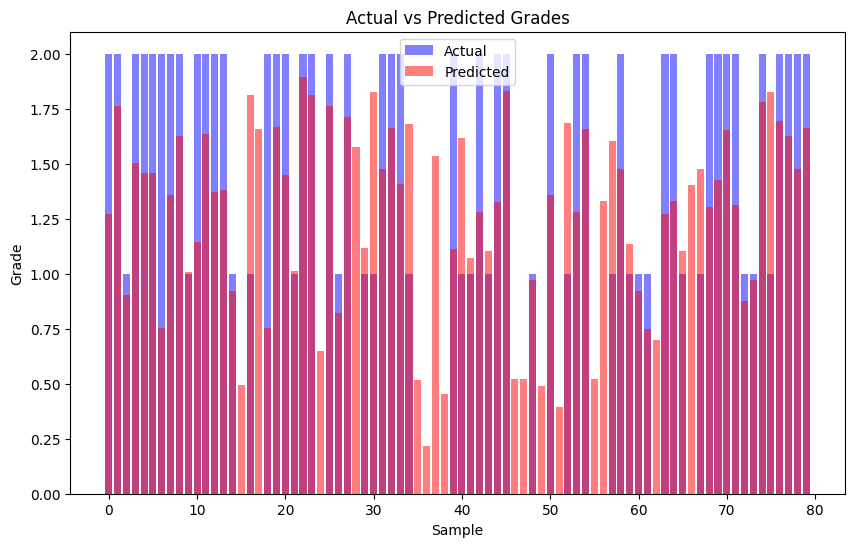

Training Time: 0.006764888763427734 seconds
Testing Time: 0.0054018497467041016 seconds


In [35]:
import time
import matplotlib.pyplot as plt

# Measure training time
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure testing time
start_time = time.time()
y_pred = model.predict(X_test)
testing_time = time.time() - start_time

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) Value:", r2)

# Calculate accuracy metrics
accuracy_rmse = 1 / rmse
accuracy_r2 = r2

# Weighted average of both accuracy measures (adjust weights as needed)
accuracy = (accuracy_rmse + accuracy_r2) / 2
print("Accuracy:", accuracy)

# Plotting accuracy graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test)), y_test, color='blue', alpha=0.5, label='Actual')
plt.bar(range(len(y_pred)), y_pred, color='red', alpha=0.5, label='Predicted')
plt.title('Actual vs Predicted Grades')
plt.xlabel('Sample')
plt.ylabel('Grade')
plt.legend()
plt.show()

# Print training and testing time
print("Training Time:", training_time, "seconds")
print("Testing Time:", testing_time, "seconds")


### Comparison between three models

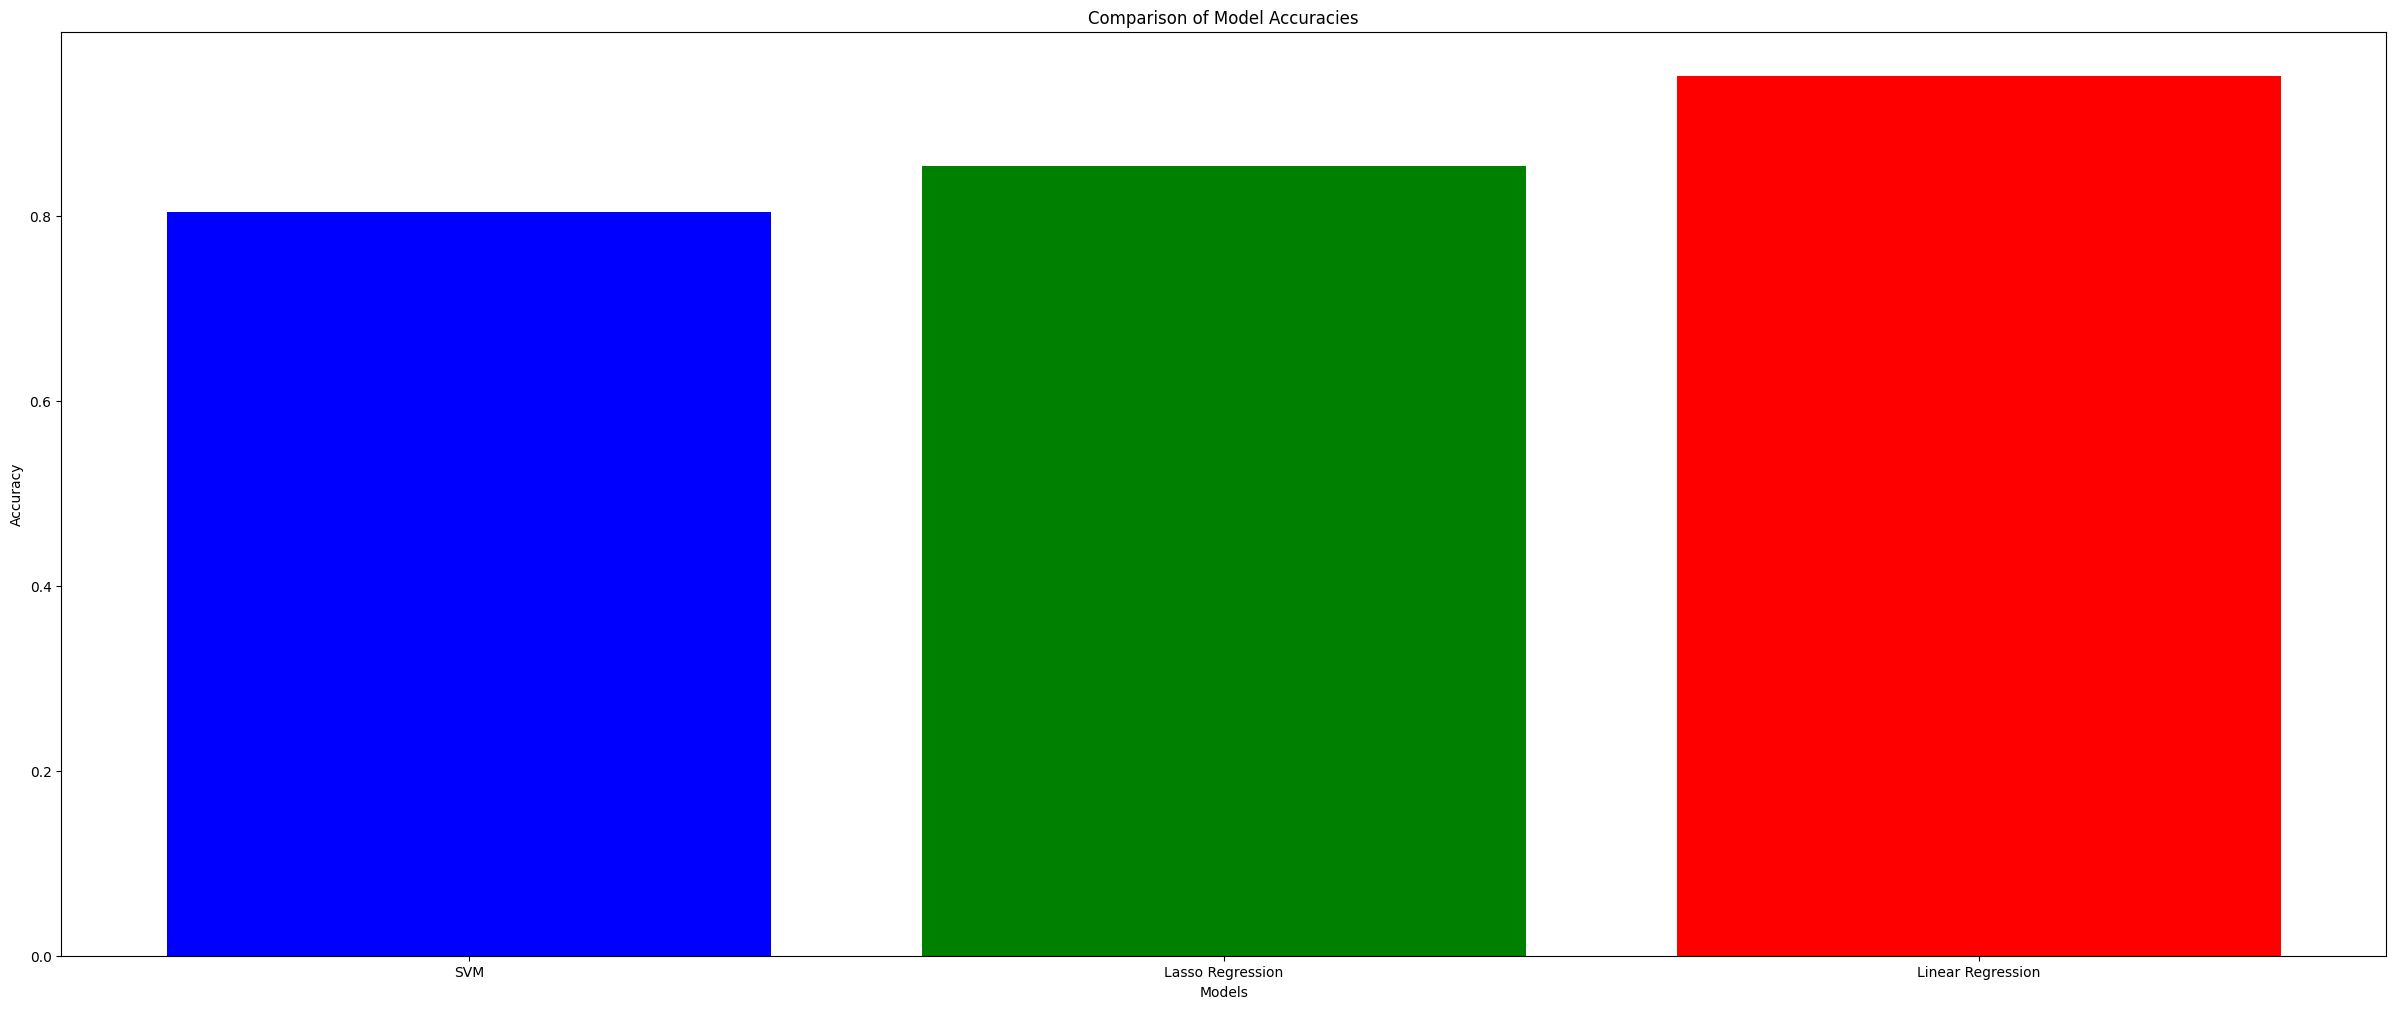

In [36]:
models = ['SVM', 'Lasso Regression', 'Linear Regression']
accuracies = [accuracy_svm, accuracy_lasso, accuracy_lr]

plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()


In [37]:
##### Prediction function
def train_and_predict_grade(df1, features):
    # Prepare the data
    X = df1[features]  # Features
    y = df1['Grade']   # Target variable
    
    
    # Train the model
    model = LinearRegression()
    model.fit(X, y)  # Fit on the entire dataset
    
    # Function to predict Grade based on features
    def predict_grade(features_values):
        return model.predict([features_values])[0]
    
    return predict_grade

# Convert to grade as A, B, C, or D
def convert_to_grade(predicted_grade):
    if predicted_grade > 1:
        return 'A'
    elif predicted_grade < 1.5:
        return 'B'
    elif predicted_grade < 2:
        return 'C'
    else:
        return 'D'

# Example usage:
# Assuming df is the DataFrame containing the data
features = ['Sex', 'High_School_Type', 'Sports_activity', 'Weekly_Study_Hours', 'Attendance', 'Reading', 'Listening_in_Class', 'Project_work']

predict_grade_function = train_and_predict_grade(df1, features)

# User Input function
def predict_student_performance():
    Sex = float(input("Enter your Gender (0 for male, 1 for female): "))
    High_School_Type  = float(input("Enter school Type (0 :Private, 1:State): "))
    Sports_activity = float(input("Enter Sport activity(0:No, 1:Yes ): "))
    Weekly_Study_Hours = float(input("Enter weekly study times(0 to 12): "))
    Attendance = float(input("Attend class (1:Always, 0:Never, 2:Sometimes) :  "))
    Reading = float(input("Have the student read in class (0 for No, 1 for Yes): "))
    Listening_in_Class = float(input("Have the student Listen in class (0 for No, 1 for Yes): "))
    Project_work = float(input("Have the student working  in project (0 for No, 1 for Yes): "))

    # Make prediction
    predicted_grade = predict_grade_function([Sex, High_School_Type, Sports_activity, Weekly_Study_Hours, Attendance, Reading, Listening_in_Class, Project_work])
    grade = convert_to_grade(predicted_grade)

    print("The student is predicted to get grade:", grade)

# Predict for user input
predict_student_performance()


The student is predicted to get grade: B


c:\Users\tuhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

# Assuming 'model' and 'features' are defined
# Open the file for writing in binary mode
with open('Grade_prediction.pickle', 'wb') as f:
    # Use pickle.dump() to serialize the 'model' and 'features' objects to the file
    pickle.dump((model, features), f)
